In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, RANSACRegressor
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

In [171]:
train = pd.read_csv('train.csv')
formula_train = pd.read_csv('formula_train.csv')
test = pd.read_csv('test.csv')

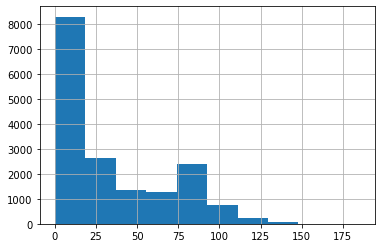

In [172]:
train['critical_temperature'].hist()

## Baseline

In [15]:
correlation = abs(train.corr()['critical_temperature'])
features = train[correlation[correlation >=0.6].keys()]
X = features.iloc[:, :-1]
y = features.iloc[:, -1].values

In [16]:
cl = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=50))
cv = ShuffleSplit(n_splits=10, test_size=0.2)
cv = KFold(n_splits=10, shuffle=True)

In [20]:
for i in range(5):
    r2 = []
    classifiers = []
    for train_index, test_index in cv.split(X):
        cl = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=10))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cl.fit(X_train, y_train)
        r2.append(r2_score(y_true=y_test, 
                           y_pred=cl.predict(X_test)))

        # получим 5 оптимальных классификаторов
        classifiers.append(cl)
    print(f'iteration {i}, acc: {np.mean(r2)}')
res = []
for c in classifiers:
    res.append(c.predict(X_test))
dat = pd.DataFrame(np.array(res).T)
dat.mean(axis=1).to_csv('answer.csv', index=False, header=0)

iteration 0, acc: 0.9045381863322859
iteration 1, acc: 0.9063820376121315
iteration 2, acc: 0.9049741989023952
iteration 3, acc: 0.9032400238597855
iteration 4, acc: 0.9073835797303735


## Use train

In [43]:
formulas = formula_train['material'].str.findall('([A-Z][a-z]*)([0-9.]*)')
a = []
for k, fe in enumerate(formulas):
    elements = formula_train[[f[0] for f in fe]].iloc[k, :]
    amount = np.array([float(f[1]) if f[1] !='' else 1 for f in fe ])
    a.append(np.sum(elements))
train['formula'] = np.array(a)
from scipy.stats import boxcox
train['normal'] = boxcox(train['critical_temperature'], 0.3)
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=2, alpha=0.5)

In [45]:
import matplotlib.pyplot as plt

In [59]:
np.log(train[['formula', 'critical_temperature']].values[:, 0])

array([1.60943791, 2.7080502 , 0.        , ..., 0.        , 2.54396141,
       1.60943791])

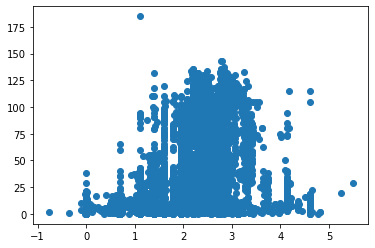

In [58]:
plt.scatter(np.log(train[['formula', 'critical_temperature']].values[:, 0]), 
            train[['formula', 'critical_temperature']].values[:, 1])

In [ ]:
for i, j in enumerate(formulas):
    for l, v in j:
        if v != '':
            formula_train.at[i, l] = formula_train.at[i, l] + np.float(v)
        else:
            formula_train.at[i, l] = formula_train.at[i, l] + 1

In [226]:
data = pd.concat((train, formula_train.iloc[:, :-1]),axis=1)

In [213]:
data.corr()['cri']

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
feature1,1.000000,-0.143847,-0.355671,-0.293672,-0.455712,0.939222,0.882318,0.681398,-0.321852,0.511752,...,-0.021827,-0.022415,-0.012088,0.015872,0.062713,-0.007323,0.104758,NaN,NaN,NaN
feature2,-0.143847,1.000000,0.816045,0.940250,0.746522,-0.104769,-0.100459,0.123859,0.450905,0.195576,...,0.039385,0.083620,0.029000,0.053613,0.088983,0.040947,0.066590,NaN,NaN,NaN
feature3,-0.355671,0.816045,1.000000,0.847721,0.964556,-0.309041,-0.415397,-0.144756,0.721212,-0.060214,...,0.044143,0.081542,0.037440,0.056701,0.063759,0.052774,0.078647,NaN,NaN,NaN
feature4,-0.293672,0.940250,0.847721,1.000000,0.856621,-0.189586,-0.234388,-0.177170,0.462499,-0.122259,...,0.038677,0.075443,0.030253,0.024280,0.050419,0.038375,0.026250,NaN,NaN,NaN
feature5,-0.455712,0.746522,0.964556,0.856621,1.000000,-0.370502,-0.486958,-0.351091,0.678597,-0.272247,...,0.039109,0.071033,0.036323,0.036428,0.031672,0.047812,0.035543,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-0.007323,0.040947,0.052774,0.038375,0.047812,-0.006950,-0.012312,0.009218,0.048532,0.011668,...,-0.000601,-0.002153,-0.000357,-0.000790,-0.001596,1.000000,0.011989,NaN,NaN,NaN
Bi,0.104758,0.066590,0.078647,0.026250,0.035543,0.064118,0.055389,0.186317,0.078418,0.169601,...,-0.003570,-0.014563,-0.002192,-0.010604,-0.011926,0.011989,1.000000,NaN,NaN,NaN
Po,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
correlation2 = abs(data.corr()['critical_temperature'])
correlation2

feature1    0.601695
feature2    0.115790
feature3    0.313932
feature4    0.233108
feature5    0.371676
              ...   
Pb          0.013307
Bi          0.169786
Po               NaN
At               NaN
Rn               NaN
Name: critical_temperature, Length: 168, dtype: float64

In [231]:
fet = data[correlation2[correlation2 >=0.2].keys()]

In [133]:
correlation = abs(train.corr()['critical_temperature'])
correlation

feature1                0.601695
feature2                0.115790
feature3                0.313932
feature4                0.233108
feature5                0.371676
                          ...   
feature79               0.440456
feature80               0.208518
feature81               0.301859
critical_temperature    1.000000
formula                 0.116671
Name: critical_temperature, Length: 83, dtype: float64

In [239]:
features = train[correlation[correlation >=0.6].keys()]
features = data[correlation2[correlation2 >=0.6].keys()]
X = features.iloc[:, :-1].values
y = features.iloc[:, -1].values

0.9018408696497004

In [ ]:
cl.fit(X, y)